In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df_user = pd.read_csv('./raw_csv/dtt_users.csv')
df_country = pd.read_csv('./raw_csv/dtt_country.csv')[['country_id','country_code','country_phonecode','country_name']]

order_col = [
    'customer_id','order_product_id','browser', 'platform', # ref
    'customer_firstname','customer_lastname','customer_email','customer_gender', #customer details
    'customer_nationality','customer_country','customer_phone_iso','customer_phone_code', # convert to country id
    'order_price_paid','order_state','order_payment_by',
    'order_quantity_infant','order_quantity_children','order_quantity_adult','order_quantity_elder', # create private, group, family, kid, adult
    'order_departure_date','date_create',# columns >> date in year, mount, year
    ]
df_order = pd.read_csv('./raw_csv/dtt_order.csv')[order_col]

id_to_countryCode = {i[1][0] : i[1][3] for i in df_country.iterrows()}
countryCode_to_id = {i[1][1] : i[1][0] for i in df_country.iterrows()}
phoneCode_to_id = {}
countryName_to_id = {i[1][3] : i[1][0] for i in df_country.iterrows()}
for i in df_country.iterrows():
    val = i[1][0]
    if len(i[1][2].split(',')) > 1:
        for j in i[1][2].split(','):
            phoneCode_to_id[j] = val
    else:
        phoneCode_to_id[i[1][2]] = val

/var/folders/5g/90_bh_2146gffg2__wzbyb780000gn/T/ipykernel_75287/71278267.py:12: DtypeWarning: Columns (2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_order = pd.read_csv('./raw_csv/dtt_order.csv')[order_col]


In [6]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

def encode_gender(inputString):
    if 'Mr.' == inputString or 'mr.' in inputString:
        return 0
    elif 'Ms.' == inputString or 'ms.' in inputString:
        return 1
    elif 'Mrs.' == inputString or 'mrs.' in inputString:
        return 2
    else:
        return 3

def encode_phone_code(inputFloat):
    try:
        return phoneCode_to_id[str(int(inputFloat))]
    except:
        print(int(inputFloat))

def encode_order_payment_by(inputString):
    if 'creditcard' == inputString:
        return 1
    elif 'paypal' == inputString:
        return 2
    else:
        return 0

In [25]:
df_order_v1 = df_order[df_order['order_state']=='payment_success']
df_order_v1

,customer_id,order_product_id,browser,platform,customer_firstname,customer_lastname,customer_email,customer_gender,customer_nationality,customer_country,...,customer_phone_code,order_price_paid,order_state,order_payment_by,order_quantity_infant,order_quantity_children,order_quantity_adult,order_quantity_elder,order_departure_date,date_create
0,10.0,29,Chrome,Macintosh,admin,admin,suphattra.y@merge.co.th,mr.,NaN,NaN,...,NaN,2850.0,payment_success,NaN,0,0,1,0,2018-03-13,2018-03-12 14:26:18
1,23.0,34,Safari,iPhone,Thanadol,Dammai,dolavic@hotmail.com,mr.,NaN,NaN,...,NaN,4100.0,payment_success,NaN,0,0,1,0,2018-03-12,2018-03-12 20:36:29
3,6.0,29,Chrome,Macintosh,tester,user,testuser@mail.com,mr.,NaN,NaN,...,NaN,2850.0,payment_success,NaN,0,0,1,0,2018-03-14,2018-03-14 15:24:41
4,23.0,34,Safari,iPhone,Thanadol,Dammai,dolavic@hotmail.com,mr.,NaN,NaN,...,NaN,2150.0,payment_success,NaN,0,0,1,0,2018-03-14,2018-03-14 18:02:28
6,1.0,29,Chrome,Macintosh,test,test,test@test.com,mr.,NaN,NaN,...,NaN,2850.0,payment_success,NaN,0,0,1,0,2018-03-14,2018-03-14 19:08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27297,0.0,34,Chrome,Windows,Noeleen,Sonego,noeleens@cdmaust.com.au,Ms.,Australian,Australia,...,61.0,4800.0,payment_success,NaN,0,0,2,0,2023-02-07,2023-01-16 12:05:54
27300,0.0,202,Chrome,Android,Alex,Schetinin,shatz.g@gmail.com,Mr.,Israel,Israel,...,972.0,3980.0,payment_success,NaN,1,0,2,0,2023-01-16,2023-01-16 15:30:44
27309,0.0,47,Chrome,Windows,Peter,Naegelein,peter.naegelein@gmx.de,Mr.,German,Germany,...,60.0,1760.0,payment_success,NaN,1,0,2,0,2023-01-18,2023-01-16 20:31:22
27318,0.0,202,Safari,iPhone,Reneta,Gesheva,rgesheva8@gmail.com,Mrs.,American,United States,...,1.0,4280.0,payment_success,NaN,0,0,2,0,2023-01-21,2023-01-17 10:27:00


In [26]:
# drop na
na_index_v1 = df_order_v1[df_order_v1['customer_country'].isna()].index
df_order_v1 = df_order_v1.drop(na_index_v1)

# drop test
test_index_v1 = df_order_v1[df_order_v1['customer_email'].map(lambda x: 'test' in str(x) or '@mail.com' in str(x) or '360' in str(x))].index
df_order_v1 = df_order_v1.drop(test_index_v1)

test_index_v2 = df_order_v1[df_order_v1['customer_email'].map(lambda x: 'mitkung' in str(x) or 'suphattra' in str(x))].index
df_order_v1 = df_order_v1.drop(test_index_v2)

test_index_v3 = df_order_v1[df_order_v1['customer_firstname'].map(lambda x: 'admin' in str(x) or 'test' in str(x) or 'Thanadol' in str(x) or 'Test' in str(x))].index
df_order_v1 = df_order_v1.drop(test_index_v3)

test_index_v3 = df_order_v1[df_order_v1['customer_firstname'].map(lambda x: ('asd' in str(x) or 'dsd' in str(x) or 'xx' in str(x)) and not 'Jasdeep' in str(x))].index
df_order_v1 = df_order_v1.drop(test_index_v3)

In [27]:
# clean
df_order_v1.loc[3627, 'customer_firstname'] = 'Jennyhan'
df_order_v1['customer_firstname'] = df_order_v1['customer_firstname'].map(lambda x: re.sub('[0-9#$;:]+', '', x))
df_order_v1['customer_lastname'] = df_order_v1['customer_lastname'].map(lambda x: re.sub('[0-9#$;:]+', '', x))
df_order_v1['customer_nationality'] = df_order_v1['customer_nationality'].map(lambda x: re.sub('ไทย|Thailand', 'thai', x))
df_order_v1['customer_nationality'] = df_order_v1['customer_nationality'].map(lambda x : x.lower())

# encode
df_order_v1['customer_gender'] = df_order_v1['customer_gender'].map(lambda x : encode_gender(str(x)))
df_order_v1['customer_country'] = df_order_v1['customer_country'].map(lambda x : countryName_to_id[x] if x != '' else x)

df_order_v1.fillna(value={'customer_phone_iso': -1, 'customer_phone_code':-1, 'order_payment_by': 0}, inplace=True)
df_order_v1['customer_phone_iso'] = df_order_v1['customer_phone_iso'].map(lambda x : -1 if x == -1 else countryCode_to_id[x])
df_order_v1['customer_phone_code'] = df_order_v1['customer_phone_code'].map(lambda x : -1 if x == -1 else encode_phone_code(x))
df_order_v1['order_payment_by'] = df_order_v1['order_payment_by'].map(lambda x : encode_order_payment_by(str(x)))

df_order_v1['customer_phone_iso'] = np.where(df_order_v1['customer_phone_iso']==-1, df_order_v1['customer_country'], df_order_v1['customer_phone_iso'])
df_order_v1['customer_phone_code'] = np.where(df_order_v1['customer_phone_code']==-1, df_order_v1['customer_country'], df_order_v1['customer_phone_iso'])

enc = OrdinalEncoder(dtype='int8', encoded_missing_value=-1)
cat_cols = ['browser', 'platform', 'order_state']
df_order_v1[cat_cols] = enc.fit_transform(df_order_v1[cat_cols])

# change dtype to int
int_cols = ['customer_phone_iso', 'customer_phone_code','order_price_paid', 'customer_id']
df_order_v1['customer_phone_iso'] = np.where(df_order_v1['customer_phone_iso']==-1, df_order_v1['customer_country'], df_order_v1['customer_phone_iso'])
df_order_v1['customer_phone_code'] = np.where(df_order_v1['customer_phone_code']==-1, df_order_v1['customer_country'], df_order_v1['customer_phone_iso'])
df_order_v1[int_cols] = df_order_v1[int_cols].astype('int64')

# convert to datetime
df_order_v1[['order_departure_date','date_create']] = df_order_v1[['order_departure_date','date_create']].apply(pd.to_datetime)

df_order_v1['booked_days'] =  df_order_v1['order_departure_date'] - df_order_v1['date_create']
df_order_v1['booked_days'] = df_order_v1['booked_days'].map(lambda x: x.days if x.days >= 0 else 0)

df_order_v1['departure_year'] = df_order_v1['order_departure_date'].map(lambda x:x.year)
df_order_v1['departure_month'] = df_order_v1['order_departure_date'].map(lambda x:x.month)
df_order_v1['departure_week'] = df_order_v1['order_departure_date'].map(lambda x:x.week)
df_order_v1['departure_day'] = df_order_v1['order_departure_date'].map(lambda x:x.day)

df_order_v1['departure_DayofYear'] = df_order_v1['order_departure_date'].map(lambda x:x.day_of_year)
df_order_v1['departure_DayofWeek'] = df_order_v1['order_departure_date'].map(lambda x:x.day_of_week)

# Majority Vote for country code
df_order_v1['Majority_code'] = df_order_v1[['customer_country','customer_phone_iso','customer_phone_code']].mode(axis=1)

# sum of kid  and adult
df_order_v1['sum_kids'] = df_order_v1['order_quantity_infant'] + df_order_v1['order_quantity_children']
df_order_v1['sum_adults'] = df_order_v1['order_quantity_adult'] + df_order_v1['order_quantity_elder']

df_order_v1['private'] = np.where((df_order_v1['sum_kids'] == 0) & (df_order_v1['sum_adults'] <= 2), 1, 0)
df_order_v1['group'] = np.where((df_order_v1['sum_kids'] == 0) & (df_order_v1['sum_adults'] > 2), 1, 0)
df_order_v1['family'] = np.where((df_order_v1['sum_kids'] > 0) & (df_order_v1['sum_adults'] > 0), 1, 0)

In [28]:
df_order_v1

,customer_id,order_product_id,browser,platform,customer_firstname,customer_lastname,customer_email,customer_gender,customer_nationality,customer_country,...,departure_week,departure_day,departure_DayofYear,departure_DayofWeek,Majority_code,sum_kids,sum_adults,private,group,family
1286,0,121,2,0,Julie,Staples,juliestaples40@gmail.com,2,british,77,...,44,29,302,0,77,0,2,1,0,0
1296,0,55,7,6,Chad,Steedman,chad.steedman@hotmail.com,0,australian,13,...,35,30,242,3,13,3,2,0,0,1
1303,0,127,2,0,Samer,Zainal,s.zainal@gmail.com,0,bahrain,23,...,35,30,242,3,23,0,1,1,0,0
1309,0,90,7,6,Tai,Nguyen,taimusicpro@gmail.com,0,australia,13,...,35,31,243,4,13,2,3,0,0,1
1310,0,46,2,0,Abhay,arya,abhayarya@hotmail.com,0,indian,198,...,35,1,244,5,198,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27297,0,34,2,4,Noeleen,Sonego,noeleens@cdmaust.com.au,1,australian,13,...,6,7,38,1,13,0,2,1,0,0
27300,0,202,2,0,Alex,Schetinin,shatz.g@gmail.com,0,israel,103,...,3,16,16,0,103,1,2,0,0,1
27309,0,47,2,4,Peter,Naegelein,peter.naegelein@gmx.de,0,german,57,...,3,18,18,2,158,1,2,0,0,1
27318,0,202,7,6,Reneta,Gesheva,rgesheva8@gmail.com,2,american,233,...,3,21,21,5,233,0,2,1,0,0


In [31]:
clean_cols = [
    'customer_id', 'order_product_id', 'browser', 'platform', # int category
    'customer_firstname', 'customer_lastname', 'customer_email', # object
    'customer_gender', 'Majority_code',  # int category
    'order_price_paid', # int value
    'order_payment_by', # int category
    'booked_days', 'departure_year', 'departure_month', 'departure_week', 'departure_day','departure_DayofYear', 'departure_DayofWeek', # int category
    'sum_kids', 'sum_adults', # int value
    'private', 'group', 'family' # int category
    ]

df_clean = df_order_v1[clean_cols]
df_clean

,customer_id,order_product_id,browser,platform,customer_firstname,customer_lastname,customer_email,customer_gender,Majority_code,order_price_paid,...,departure_month,departure_week,departure_day,departure_DayofYear,departure_DayofWeek,sum_kids,sum_adults,private,group,family
1286,0,121,2,0,Julie,Staples,juliestaples40@gmail.com,2,77,4500,...,10,44,29,302,0,0,2,1,0,0
1296,0,55,7,6,Chad,Steedman,chad.steedman@hotmail.com,0,13,3440,...,8,35,30,242,3,3,2,0,0,1
1303,0,127,2,0,Samer,Zainal,s.zainal@gmail.com,0,23,699,...,8,35,30,242,3,0,1,1,0,0
1309,0,90,7,6,Tai,Nguyen,taimusicpro@gmail.com,0,13,2250,...,8,35,31,243,4,2,3,0,0,1
1310,0,46,2,0,Abhay,arya,abhayarya@hotmail.com,0,198,4100,...,9,35,1,244,5,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27297,0,34,2,4,Noeleen,Sonego,noeleens@cdmaust.com.au,1,13,4800,...,2,6,7,38,1,0,2,1,0,0
27300,0,202,2,0,Alex,Schetinin,shatz.g@gmail.com,0,103,3980,...,1,3,16,16,0,1,2,0,0,1
27309,0,47,2,4,Peter,Naegelein,peter.naegelein@gmx.de,0,158,1760,...,1,3,18,18,2,1,2,0,0,1
27318,0,202,7,6,Reneta,Gesheva,rgesheva8@gmail.com,2,233,4280,...,1,3,21,21,5,0,2,1,0,0


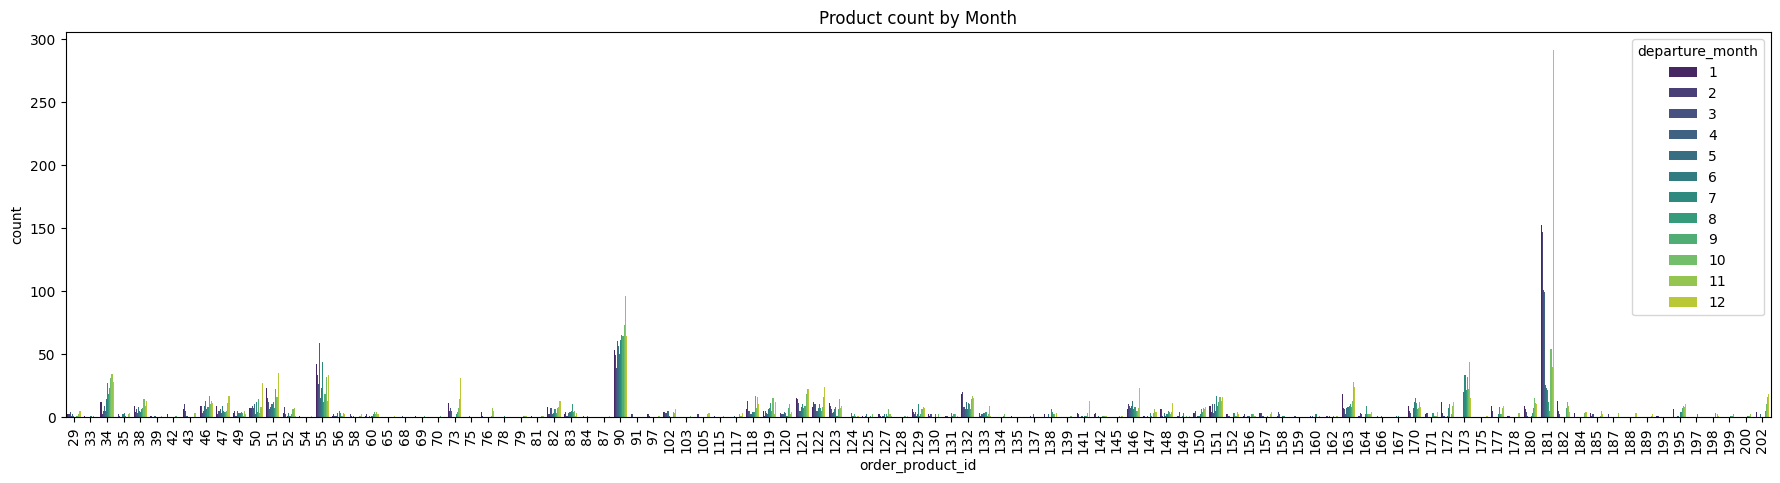

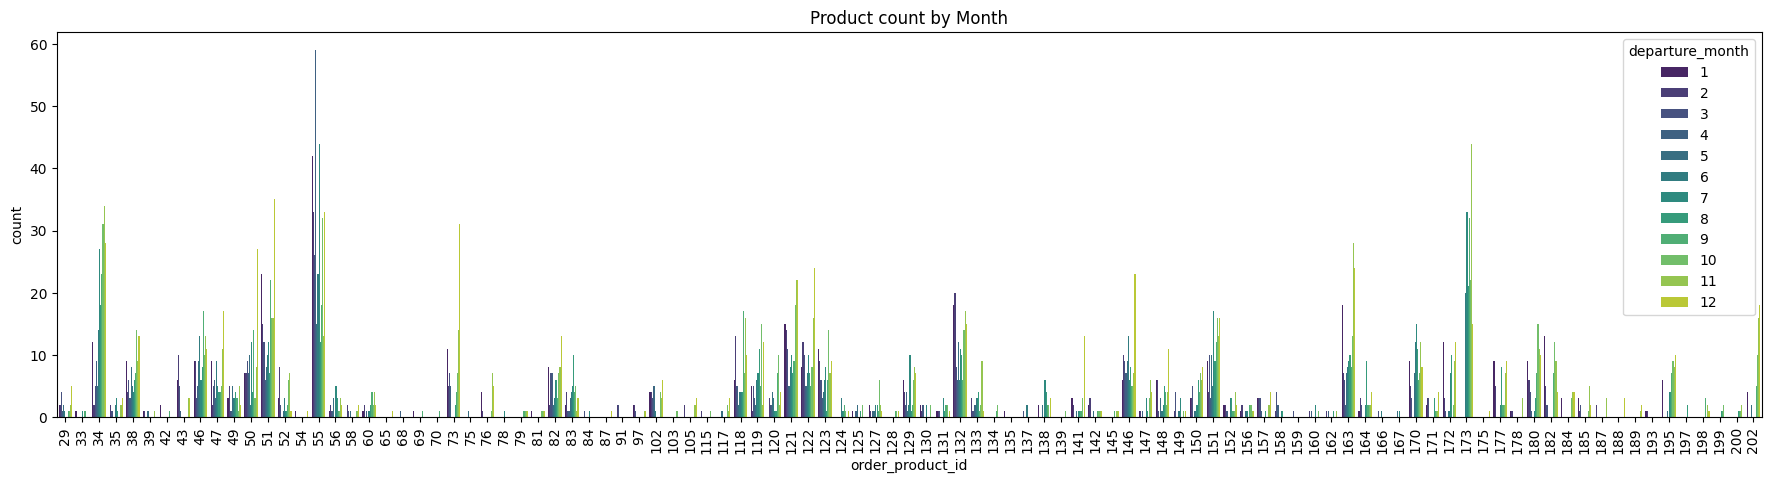

In [13]:
plt.figure(figsize=(22, 5))
sns.countplot(data=df_clean, x = 'order_product_id', hue='departure_month', palette="viridis")
plt.title('Product count by Month')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(22, 5))
sns.countplot(data=df_clean[~df_clean['order_product_id'].isin([181,90])], x = 'order_product_id', hue='departure_month', palette="viridis")
plt.title('Product count by Month')
plt.xticks(rotation=90)
plt.show()

In [14]:
df_product = pd.read_csv('./raw_csv/dtt_product.csv')[['product_id','product_slug']]
test_product_id = [22, 23, 24, 25, 26, 27, 28, 32, 37, 72, 110, 116]
df_product = df_product[~df_product['product_id'].isin(test_product_id)]

# dict of product url
productID_to_url = {i[1][0] : 'www.daytriptour.com/trip/' + i[1][1] for i in df_product.iterrows()}

In [15]:
print(productID_to_url[55])

www.daytriptour.com/trip/splashjungle


In [20]:
print(productID_to_url[181])
print(productID_to_url[90])
print(productID_to_url[105])
print(productID_to_url[151])

www.daytriptour.com/trip/aquaria-phuket
www.daytriptour.com/trip/phuket-simon-cabaret
www.daytriptour.com/trip/white-water-rafting-krabi
www.daytriptour.com/trip/mahanakhon-skywalk


In [23]:
df_group = df_clean.groupby(['order_product_id','departure_month']).size().reset_index(name='counts')
month_cols = ['m_'+str(x) for x in range(1,13)]
df_product_count_by_month = pd.DataFrame(columns=['product_id']+month_cols)
for i in df_group['order_product_id'].unique():
    df = df_group[df_group['order_product_id']==i]
    s = pd.Series(dict(zip(df.departure_month.map(lambda x : 'm_'+str(x)),df.counts))).T
    s['product_id'] = i
    s = pd.DataFrame(s).T
    df_product_count_by_month = pd.concat([df_product_count_by_month,s], ignore_index=True)
df_product_count_by_month

,product_id,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,29,2,2,4,1,2,1,NaN,NaN,1,1,2,5
1,33,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
2,34,12,2,5,9,5,14,27,18,23,31,34,28
3,35,NaN,2,1,NaN,NaN,2,3,1,NaN,NaN,2,3
4,38,9,4,6,3,8,5,4,6,7,14,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
99,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,1
100,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,NaN,NaN
101,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,NaN


In [24]:
df_group['order_product_id'].unique()

array([ 29,  33,  34,  35,  38,  39,  42,  43,  46,  47,  49,  50,  51,
        52,  54,  55,  56,  58,  60,  65,  68,  69,  70,  73,  75,  76,
        78,  79,  81,  82,  83,  84,  87,  90,  91,  97, 102, 103, 105,
       115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 137, 138, 139, 141, 142, 145, 146,
       147, 148, 149, 150, 151, 152, 156, 157, 158, 159, 160, 162, 163,
       164, 166, 167, 170, 171, 172, 173, 175, 177, 178, 180, 181, 182,
       184, 185, 187, 188, 189, 193, 195, 197, 198, 199, 200, 202])

### week

In [32]:
df_group = df_clean.groupby(['order_product_id','departure_week']).size().reset_index(name='counts')

In [33]:
df_group

,order_product_id,departure_week,counts
0,29,1,2
1,29,2,1
2,29,5,1
3,29,6,1
4,29,10,2
...,...,...,...
1730,202,48,4
1731,202,49,4
1732,202,50,3
1733,202,51,6


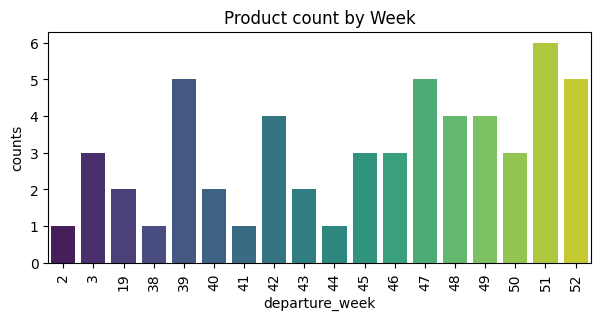

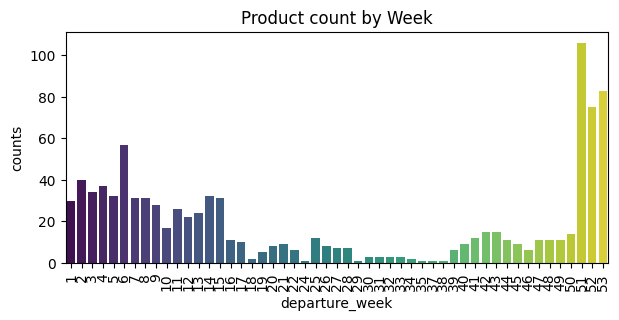

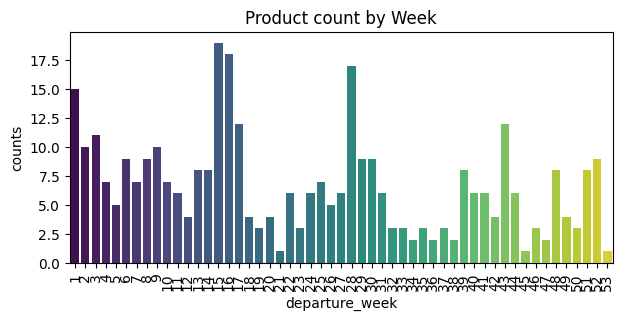

In [49]:
plt.figure(figsize=(7, 3))
sns.barplot(data=df_group[df_group['order_product_id']==202], x = 'departure_week', y='counts', palette="viridis")
plt.title('Product count by Week')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(7, 3))
sns.barplot(data=df_group[df_group['order_product_id']==181], x = 'departure_week', y='counts', palette="viridis")
plt.title('Product count by Week')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(7, 3))
sns.barplot(data=df_group[df_group['order_product_id']==55], x = 'departure_week', y='counts', palette="viridis")
plt.title('Product count by Week')
plt.xticks(rotation=90)
plt.show()

In [51]:
test = df_product_count_by_month.fillna(0)
test[month_cols] = test[month_cols]+1

In [52]:
test

,product_id,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,29,3,3,5,2,3,2,1,1,2,2,3,6
1,33,2,1,1,1,1,1,2,1,2,1,1,1
2,34,13,3,6,10,6,15,28,19,24,32,35,29
3,35,1,3,2,1,1,3,4,2,1,1,3,4
4,38,10,5,7,4,9,6,5,7,8,15,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,197,1,1,1,1,1,1,1,3,1,1,1,1
99,198,1,1,1,1,1,1,1,1,4,1,3,2
100,199,1,1,1,1,1,1,1,2,2,3,1,1
101,200,1,1,1,1,1,1,1,2,2,2,3,1


In [53]:
def softmax(x, axis = 1):
    return np.exp(x)/np.sum(np.exp(x),axis=axis, keepdims=True)

In [55]:
test[month_cols] = softmax(test[month_cols].to_numpy())

In [56]:
test

,product_id,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,29,3.010526e-02,3.010526e-02,2.224495e-01,1.107511e-02,3.010526e-02,1.107511e-02,4.074305e-03,4.074305e-03,0.011075,0.011075,0.030105,0.604680
1,33,1.584556e-01,5.829257e-02,5.829257e-02,5.829257e-02,5.829257e-02,5.829257e-02,1.584556e-01,5.829257e-02,0.158456,0.058293,0.058293,0.058293
2,34,2.648578e-10,1.202453e-14,2.415191e-13,1.318649e-11,2.415191e-13,1.957049e-09,8.658248e-04,1.068513e-07,0.000016,0.047272,0.949492,0.002354
3,35,1.374102e-02,1.015332e-01,3.735196e-02,1.374102e-02,1.374102e-02,1.015332e-01,2.759957e-01,3.735196e-02,0.013741,0.013741,0.101533,0.275996
4,38,4.862669e-03,3.276441e-05,2.420980e-04,1.205335e-05,1.788876e-03,8.906289e-05,3.276441e-05,2.420980e-04,0.000658,0.721684,0.004863,0.265493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,197,5.438017e-02,5.438017e-02,5.438017e-02,5.438017e-02,5.438017e-02,5.438017e-02,5.438017e-02,4.018181e-01,0.054380,0.054380,0.054380,0.054380
99,198,2.551484e-02,2.551484e-02,2.551484e-02,2.551484e-02,2.551484e-02,2.551484e-02,2.551484e-02,2.551484e-02,0.512479,0.025515,0.188531,0.069357
100,199,4.581771e-02,4.581771e-02,4.581771e-02,4.581771e-02,4.581771e-02,4.581771e-02,4.581771e-02,1.245455e-01,0.124545,0.338550,0.045818,0.045818
101,200,4.247384e-02,4.247384e-02,4.247384e-02,4.247384e-02,4.247384e-02,4.247384e-02,4.247384e-02,1.154559e-01,0.115456,0.115456,0.313842,0.042474
